# **Escenario similado - Tangram** 
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**


El Tangram es un rompecabezas que está compuesto por 7 piezas: un paralelogramo (romboide), un cuadrado y 5 triángulos. El objetivo de este juego es crear figuras utilizando las 7 piezas. Las piezas deben tocarse pero no superponerse. Según los registros históricos chinos, estos muebles estaban formados originalmente por un juego de 6 mesas rectangulares. Más adelante se agregó una mesa triangular y las personas podían acomodar las mesas de manera que formaran una gran mesa cuadrada. Hubo otra variación más adelante, durante la dinastía Ming, y un poco más tarde fue cuando se convirtió en un juego.



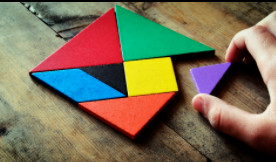

Importamos las librerias necesarias:

In [7]:
# importamos las librerias
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np
import os

### **Cargar imagenes del dataset**
En primer lugar vamos a cargar la imagen del problema a resolver. En este caso hemos decidio lanzarnos al espacio con la construcción de un cohete.

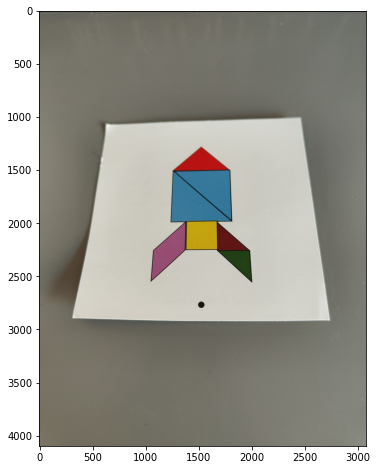

In [9]:
# ruta
rocket_path = 'data/Rocket.jpg'

# cargamos la imagen
rocket = cv2.cvtColor(cv2.imread(rocket_path), cv2.COLOR_RGB2BGR)

# mostramos la imagen
plt.imshow(rocket)
plt.show()

### **Transformacion proyectiva**

A continuació se pide realizar una transformación proyectiva para poder quitar la perspectiva de la foto original. El tamaño resultante debe ser de 600x600.

El resultado esperado es el siguiente:

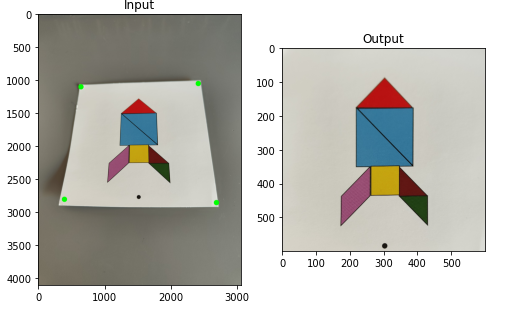

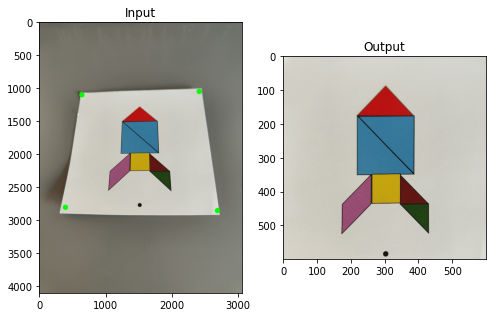

In [10]:

# copiamos la imagen
original = rocket.copy()

# constantes
radius = 0
color = (0, 255, 0)
thickness = 80
output_size = 600

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[650,1100],[2425,1050],[400,2800],[2700,2850]])
destination_points = np.float32([[0,0],
                                 [output_size,0],
                                 [0,output_size],
                                 [output_size,output_size]])

# obtenemos la matriz de  translacion y rotación
M = cv2.getPerspectiveTransform(original_points,destination_points)

# aplicamos la matriz sobre la imagen
output_image = cv2.warpPerspective(original, M, (output_size,output_size))

# pintamos los puntos
for i in range(len(original_points)):
  original = cv2.circle(original,
                        (original_points[i][0],original_points[i][1]),
                        radius = radius, 
                        color = color, 
                        thickness= thickness)

# pintamos las dos imagenes
plt.subplot(121),plt.imshow(original),plt.title('Input')
plt.subplot(122),plt.imshow(output_image),plt.title('Output')
plt.show()

### **Cargar y printar las piezas del tangram**

A continuación se pide cargar y mostrar en el mismo plot las 9 imagenes de las piezas que vamos a utilizar para montar nuestro cohete con el tangram.

In [11]:
# ruta
tans_path = 'data/tans'

Utilizar el metodo [os.listdir](https://www.tutorialspoint.com/python/os_listdir.htm) para leer los archivos y el metodo [os.path.join](https://docs.python.org/3/library/os.path.html) para poder combinar los nombres de los archivos con la ruta donde estab ubicados. Guardar todas las imagenes en un array llamado
```
input_images = []
```


Este es el resultado esperado:

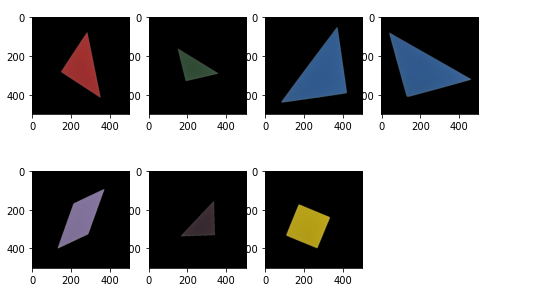

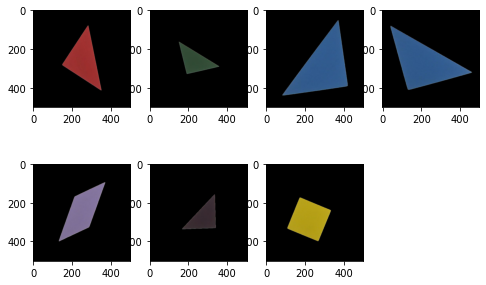

In [12]:
# obtenemos los archivos
files = os.listdir(tans_path)

# calculamos el numero de filas y columnas para el plot
nrows = round(len(files) /2) - 1
ncols = (round(len(files) /2) +  round(len(files) %2)) - 1

# creamos la figura para el plot
fig = plt.figure()

#iterador
i = 1

# array para guardar las imagenes de entrada
input_images = []

# recorremos los archivos
for file in files:
  # cargamos la imagen y la añadimos a la lista
  input_images.append(cv2.cvtColor(cv2.imread(os.path.join(tans_path, file)), cv2.COLOR_RGB2BGR))
  
  # pintamos en su posicion
  fig.add_subplot(nrows, ncols, i)
  plt.imshow(input_images[-1])
  i = i +1
plt.show()

### **Montar el cohete**
Una vez hemos cargado las imagenes, vamos a empezar a montar el cohete. Para ello crearemos un array donde iremos almacenando las imagenes que deben tener un tamaño de 600x600 y donde iremos enganchando las piezas para conseguir el cohete.

El resultado final deberia ser algo asi:

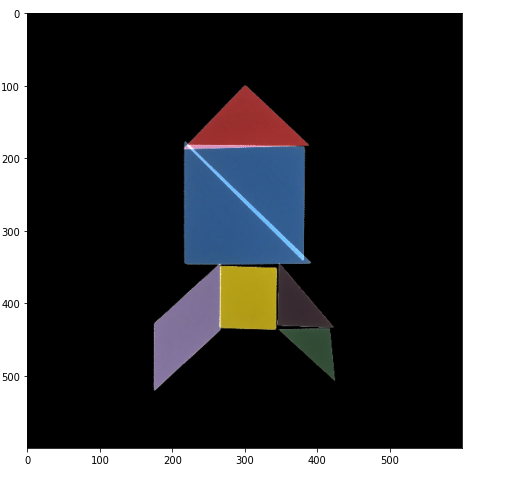

Para poder ir montando las piezas, vamos a crear un array donde ir guardando las imagenes con las piezas colocadas en su sitio.

In [13]:
# array para las imagenes de salida
output_images = [None] * len(input_images)

En primer lugar se pide crear un metodo capaz de mediante transformadas afines colocar las piezas en su sitio en la imagen originial. Para ello de deberan seleccionar tres puntos de la pieza, tres puntos del destino y colocarlos en una imagen de salida. El metodo debe hacer un plot de la imagen de entrada con los puntos seleccionados, la imagen del cohete con los puntos destino y la imagen final.


Definiremos el metodo de la siguinte manera
```
def affine_transform_method (original, dst, original_points, destination_points):
  """
  Metodo para crear una transformada affin
  Parameters:
    param original(np.array) : Imagen original
    param dst(np.array) : Imagen de destino
    param original_points(np.float32) : puntos originales
    param destination_points(np.float32) : puntos de destino
  """
```



Este metodo debe dara para cada una de las piezas de tangram un resultado similar al siguiente e irlo guardando en el array de salida de manera que al final sumando todas las imagenes tendremos el cohete.

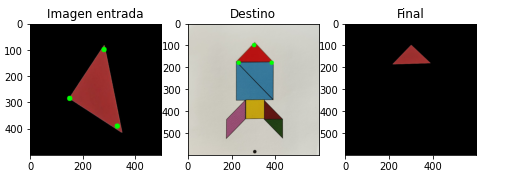

In [14]:
def affine_transform_method (original, dst, original_points, destination_points):
  """
  Metodo para crear una transformada affin
  Parameters:
    param original(np.array) : Imagen original
    param dst(np.array) : Imagen de destino
    param original_points(np.float32) : puntos originales
    param destination_points(np.float32) : puntos de destino
  """
  # copiamos la imagen
  input = original.copy()

  # constantes
  radius = 0
  color = (0, 255, 0)
  thickness = 20

  # pintamos los puntos
  for i in range(len(original_points)):
    input = cv2.circle(input,
                          (original_points[i][0],original_points[i][1]),
                          radius = radius, 
                          color = color, 
                          thickness= thickness)
    dst = cv2.circle(dst,
                          (destination_points[i][0],destination_points[i][1]),
                          radius = radius, 
                          color = color, 
                          thickness= thickness)
    
  # obtenemos la matriz de  translacion y rotación
  M = cv2.getAffineTransform(original_points,destination_points)

  # aplicamos la matriz sobre la imagen
  dst2 = cv2.warpAffine(original, M, (output_size,output_size))

  # pintamos las dos imagenes
  plt.subplot(131),
  plt.imshow(input),plt.title('Imagen entrada')
  plt.subplot(132),plt.imshow(dst),plt.title('Destino')
  plt.subplot(133),plt.imshow(dst2),plt.title('Final')
  plt.show()

  return dst2

### **Pieza 0**

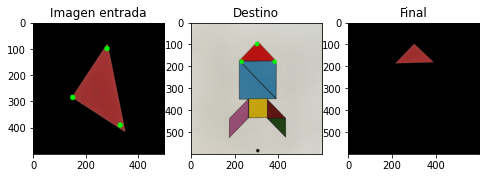

In [15]:

# seleccion de la imagen de salida
image_index = 0

# copiamos la imagen
original = input_images[image_index].copy()
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[330,390],[280,100],[150,285]])
destination_points = np.float32([[230,180],[380,180],[300,100]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Pieza 1**

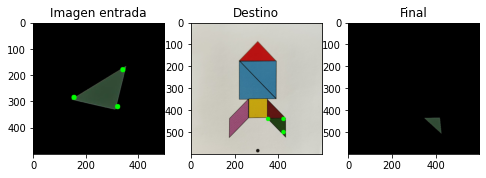

In [16]:
# seleccion de la imagen de salida
image_index = 1

# copiamos la imagen
original = cv2.flip(input_images[image_index].copy(),1)
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[340,180],[320,320],[155,285]])
destination_points = np.float32([[420,500],[420,440],[350,440]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Pieza 2**

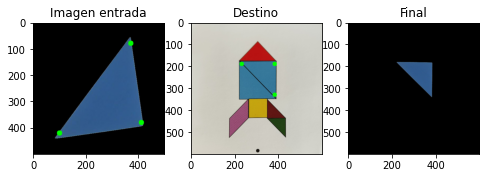

In [17]:

# seleccion de la imagen de salida
image_index = 2

# copiamos la imagen
original = input_images[image_index].copy()
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[100,420],[410,380],[370,80]])
destination_points = np.float32([[230,190],[380,190],[380,330]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Pieza 3**

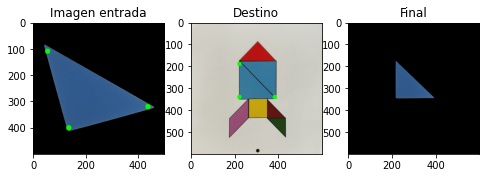

In [18]:
# seleccion de la imagen de salida
image_index = 3

# copiamos la imagen
original = input_images[image_index].copy()
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[55,110],[135,400],[435,320]])
destination_points = np.float32([[220,190],[220,340],[380,340]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Pieza 4**

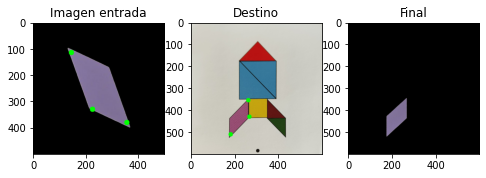

In [19]:
# seleccion de la imagen de salida
image_index = 4

# copiamos la imagen
original = cv2.flip(input_images[image_index].copy(),1)
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[145,115],[355,380],[225,330]])
destination_points = np.float32([[180,510],[260,355],[265,430]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Pieza 5**

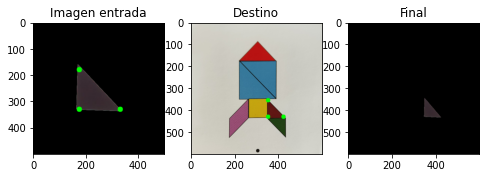

In [20]:
# seleccion de la imagen de salida
image_index = 5

# copiamos la imagen
original = cv2.flip(input_images[image_index].copy(),1)
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[175,180],[330,330],[175,330]])
destination_points = np.float32([[350,355],[420,430],[350,430]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Pieza 6**

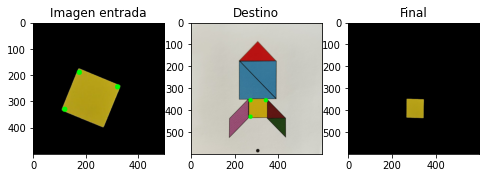

In [21]:
# seleccion de la imagen de salida
image_index = 6

# copiamos la imagen
original = input_images[image_index].copy()
dst = output_image.copy()

# creamos los puntos en la imagen original y en la imagen de salida
original_points = np.float32([[175,190],[320,245],[120,330]])
destination_points = np.float32([[270,355],[340,355],[270,430]])

# llamamos al metodo y guardamos la imagen final
output_images[image_index] = affine_transform_method(original, dst, original_points, destination_points)

### **Obtener el resultado final**

Finalmente vamos a sumar todas las imagenes para crear la imagen de salida del cohete. Para ello vamos a utilizar una función de opencv que nos permite sumar imagenes y que se vera en proximos temas en detalle [cv2.add()](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html)



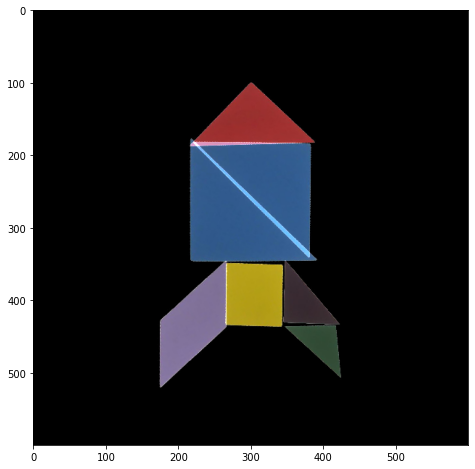

In [22]:
# cogemos la primera imagen
output_rocket = output_images[0]

# recorremos todas las imagenes añadiendo las piezas a la primera imagen
for i in range(1, len(output_images)):
  # si la imagen no esta vacia
  if output_images[i] is not None:
    output_rocket =  cv2.add(output_rocket, output_images[i])
  else:
    break

# mostramos el resultado final
plt.imshow(output_rocket)
plt.show()